In [1]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns



# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 



In [2]:
df_health = pd.read_csv("/Users/swatiraman/Downloads/drive-download-20210428T114902Z-001/df.csv")
df_health.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
0,73557,8,2,1,69,NaN,4,4,1,NaN,...,6.586219,-6.527018,9.182882,-9.018023,-6.181923,5.151193,-9.708139,2.814690,-2.712184,-6.811191
1,73558,8,2,1,54,NaN,3,3,1,NaN,...,-9.588554,1.863741,-9.378731,8.289190,-2.561066,-3.755943,1.406037,7.590942,0.480820,-4.636475
2,73559,8,2,1,72,NaN,3,3,2,NaN,...,-5.229054,6.379788,-9.433054,-9.285869,9.248429,-7.439368,8.374918,8.401561,-9.936335,0.913262
3,73560,8,2,1,9,NaN,3,3,1,119.0,...,7.428271,-1.193575,6.972074,-0.257756,-5.087773,8.581422,4.767615,9.760521,-4.708915,7.624684
4,73561,8,2,2,73,NaN,3,3,1,NaN,...,2.125105,-2.906226,1.977286,-1.322955,-1.034636,6.702919,-1.735375,-4.799543,1.194572,-7.098007


In [3]:
for i in df_health.columns:
    if (df_health[i].isnull().sum() > 2000):
        df_health.drop(i,axis=1,inplace=True)

In [4]:
for i in df_health.columns:
    if (df_health[i].isnull().sum() > 0 ):
        #df[i].fillna(df[i].median,inplace=True)
        print(i,'contain almost all null values',df_health[i].isnull().sum())

DMDCITZN contain almost all null values 4
SIAPROXY contain almost all null values 1
FIALANG contain almost all null values 101
FIAPROXY contain almost all null values 101
FIAINTRP contain almost all null values 101
DMDHRBR4 contain almost all null values 265
DMDHREDU contain almost all null values 262
DMDHRMAR contain almost all null values 112
INDHHIN2 contain almost all null values 113
INDFMIN2 contain almost all null values 103
INDFMPIR contain almost all null values 730
WTDR2D contain almost all null values 1152
DR1EXMER contain almost all null values 1030
DRABF contain almost all null values 1152
DRDINT contain almost all null values 1152
DR1DBIH contain almost all null values 1107
DR1DAY contain almost all null values 1030
DR1LANG contain almost all null values 1016
DR1MNRSP contain almost all null values 1160
DR1HELPD contain almost all null values 1185
DBQ095Z contain almost all null values 1030
DRQSPREP contain almost all null values 1030
DR1STY contain almost all null values 

df.columns

In [5]:
for i in df_health.columns:
    if (df_health[i].isnull().sum() > 0 ):
        df_health[i].fillna(df_health[i].mean(),inplace=True)
        #print(i,'contain almost all null values',df_health[i].isnull().sum())

In [6]:
df_health.shape

(9813, 159)

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_health)


df_scaled = pd.DataFrame(scaled_data, columns = df_health.columns)

df_scaled.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,DMDCITZN,...,DRD340,DRD360,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,LBXSAL,LBDSALSI,LBXSAPSI
count,9.813000e+03,9813.0,9813.0,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,...,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03,9.813000e+03
mean,-1.584475e-15,0.0,0.0,4.063916e-17,3.710926e-18,2.192614e-17,4.057807e-16,3.990603e-16,-5.110443e-17,-1.310104e-15,...,6.595944e-18,-2.613487e-17,-6.629886e-18,3.197279e-17,-3.254980e-17,1.733274e-17,1.712909e-17,2.525240e-17,1.731011e-17,-1.357656e-17
std,1.000051e+00,0.0,0.0,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-1.731380e+00,0.0,0.0,-1.015508e+00,-1.296490e+00,-1.650184e+00,-1.416713e+00,-1.017166e+00,-1.390983e-01,-2.871655e-01,...,-1.239705e+00,-1.537897e+00,-1.641090e+00,-2.232488e+00,-1.717146e+00,-2.135666e+00,-1.745580e+00,-2.028164e+00,-1.995169e+00,-1.707871e+00
25%,-8.686779e-01,0.0,0.0,-1.015508e+00,-8.865920e-01,-8.582604e-01,-7.947736e-01,-1.017166e+00,-1.390983e-01,-2.871655e-01,...,-1.054675e+00,-9.766310e-01,-7.365068e-01,-7.503462e-01,-9.437948e-01,-7.884702e-01,-8.567073e-01,-8.424562e-01,-9.150260e-01,-7.359487e-01
50%,-5.308838e-04,0.0,0.0,9.847288e-01,-1.897653e-01,-6.633663e-02,-1.728347e-01,9.831241e-01,-1.390983e-01,-2.871655e-01,...,-4.033087e-01,-2.141346e-01,-1.211135e-01,-2.226084e-01,-2.618338e-01,2.335002e-01,5.056937e-01,3.566948e-01,-5.123258e-02,-4.406316e-01
75%,8.665951e-01,0.0,0.0,9.847288e-01,8.349799e-01,7.255871e-01,4.491042e-01,9.831241e-01,-1.390983e-01,-2.871655e-01,...,1.314337e+00,1.016735e+00,7.263260e-01,1.031064e+00,9.003270e-01,8.277328e-01,8.524805e-01,9.171456e-01,8.686700e-01,7.242583e-01
max,1.730999e+00,0.0,0.0,9.847288e-01,1.982694e+00,1.517511e+00,2.314921e+00,9.831241e-01,4.797677e+01,2.296820e+01,...,1.735305e+00,1.565903e+00,1.799853e+00,1.863324e+00,1.523652e+00,1.306299e+00,1.409813e+00,1.215246e+00,1.998478e+00,1.725715e+00


In [8]:
from sklearn.decomposition import PCA
pca=PCA()
pcadata=pca.fit_transform(df_scaled)

In [9]:
df_scaled.shape[1]

159

In [10]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = df_scaled.shape[1])
pca_data = pca.fit_transform(df_scaled)
exp_var_ratio= pca.explained_variance_ratio_
exp_var_ratio.round(3)

cum_var=exp_var_ratio[0]
itr=2 # defined as two as first pc1 variance defined outside the loop
for j in exp_var_ratio[1:]:
    cum_var=cum_var+j
    if cum_var >= 0.95:
        break
    itr=itr+1

print('The number of principle components capturing 95 percent variation in data is : ',itr,' Variance explained is ', cum_var)

The number of principle components capturing 95 percent variation in data is :  83  Variance explained is  0.9500695310852093


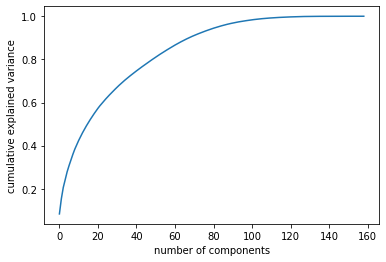

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [12]:
from sklearn.cluster import KMeans
cl=[5,6,10,20,21,22,23,24,25,26,27,28,29,30,40,45,50]
for k in cl:
    clust_mod=KMeans(n_clusters=k,max_iter=1000,random_state=0)
    clust_mod.fit(pcadata)
    print(k,silhouette_score(pcadata,clust_mod.labels_))

5 0.08856953400274342
6 0.10164942473341237
10 0.13284261854769816
20 0.20892155837111895
21 0.21526105889397237
22 0.21728415289781156
23 0.1875456875327759
24 0.1637484478837534
25 0.194727000766218
26 0.1751506299781011
27 0.18821744954098188
28 0.18656144501589522
29 0.17882772012978054
30 0.20984508602977664
40 0.1555901739721782
45 0.12282549835300217
50 0.12293611775671846


In [13]:
clusters = KMeans(n_clusters = 22, random_state = 10)

# fit the model
clusters.fit(pcadata)

# create a copy of the original dataframe
df_cluster = df_health.copy()


# add the cluster labels as the new column in the dataframe
df_cluster['Cluster_id'] = clusters.labels_

Silhouette Score for  20 clusters is  0.21490427497981698


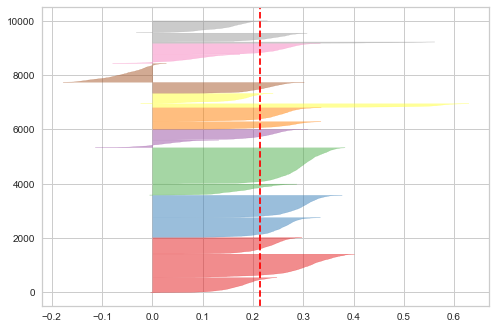

Silhouette Score for  21 clusters is  0.18747027506106087


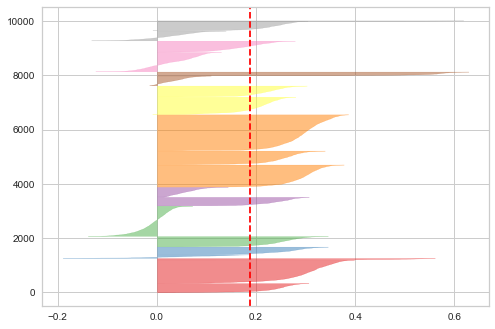

Silhouette Score for  22 clusters is  0.19216821829844188


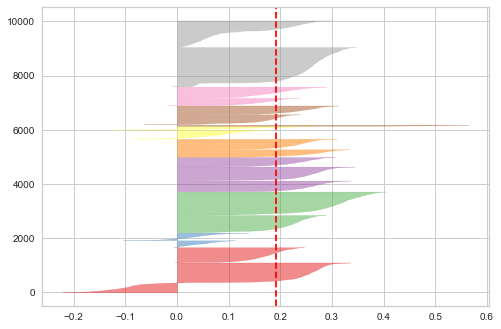

Silhouette Score for  23 clusters is  0.21272544753649902


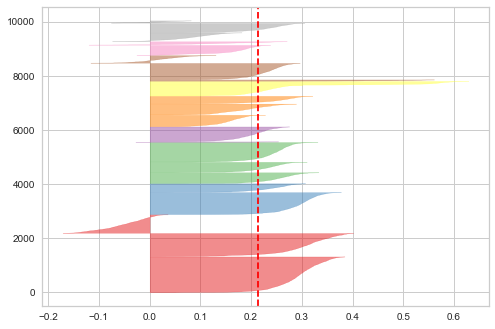

Silhouette Score for  24 clusters is  0.1734592254248911


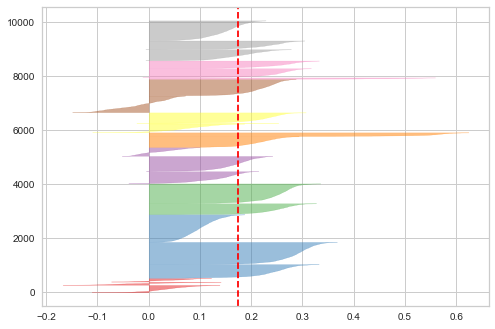

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(20,25):
    km = KMeans(n_clusters=i)
    km.fit(pcadata)
    sil_score = silhouette_score(pcadata, km.labels_)
    
    print('Silhouette Score for ', i , 'clusters is ',sil_score)
    sil_km = SilhouetteVisualizer(km)
    sil_km.fit(pcadata)
    plt.show()

In [15]:
df_cluster[['SEQN','Cluster_id']].head(20)

,SEQN,Cluster_id
0,73557,19
1,73558,18
2,73559,12
3,73560,20
4,73561,3
5,73562,1
6,73563,14
7,73564,9
8,73566,3
9,73567,0


In [16]:
df_cluster[['SEQN','Cluster_id']].to_csv('/Users/swatiraman/Downloads/SwatiRaman_3.csv')